In [3]:
import numpy as np 
import pandas as pd 
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [4]:
data_dir = Path(r"C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone")
train_dir = data_dir / 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
train_dir

WindowsPath('C:/Users/Game/Downloads/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

In [5]:
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

train_data = []
for img in Cyst_cases:
    train_data.append((img, 0))
    
for img in normal_cases:
    train_data.append((img,1))
    
for img in Stone_cases:
    train_data.append((img,2))
    
for img in Tumor_cases:
    train_data.append((img, 3))
    
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Norm...,1
1,C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Norm...,3
2,C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Norm...,0
3,C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Norm...,3
4,C:\Users\Game\Downloads\CT-KIDNEY-DATASET-Norm...,0


In [6]:
train_data['label'].unique()

array([1, 3, 0, 2], dtype=int64)

In [7]:
train_data.shape

(12446, 2)

1    5077
0    3709
3    2283
2    1377
Name: label, dtype: int64


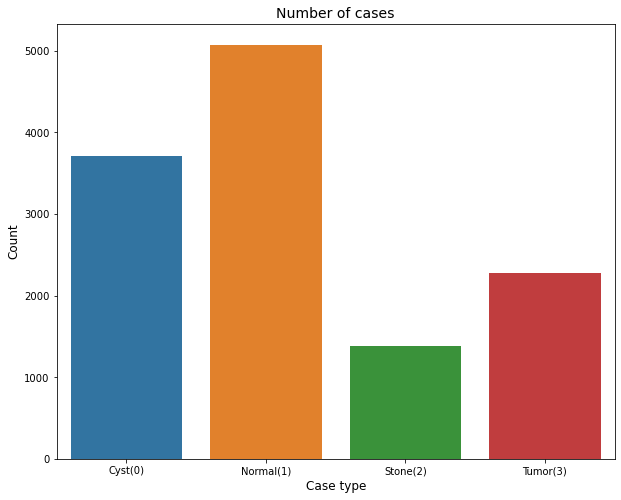

In [8]:
cases_count = train_data['label'].value_counts()
print(cases_count)

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

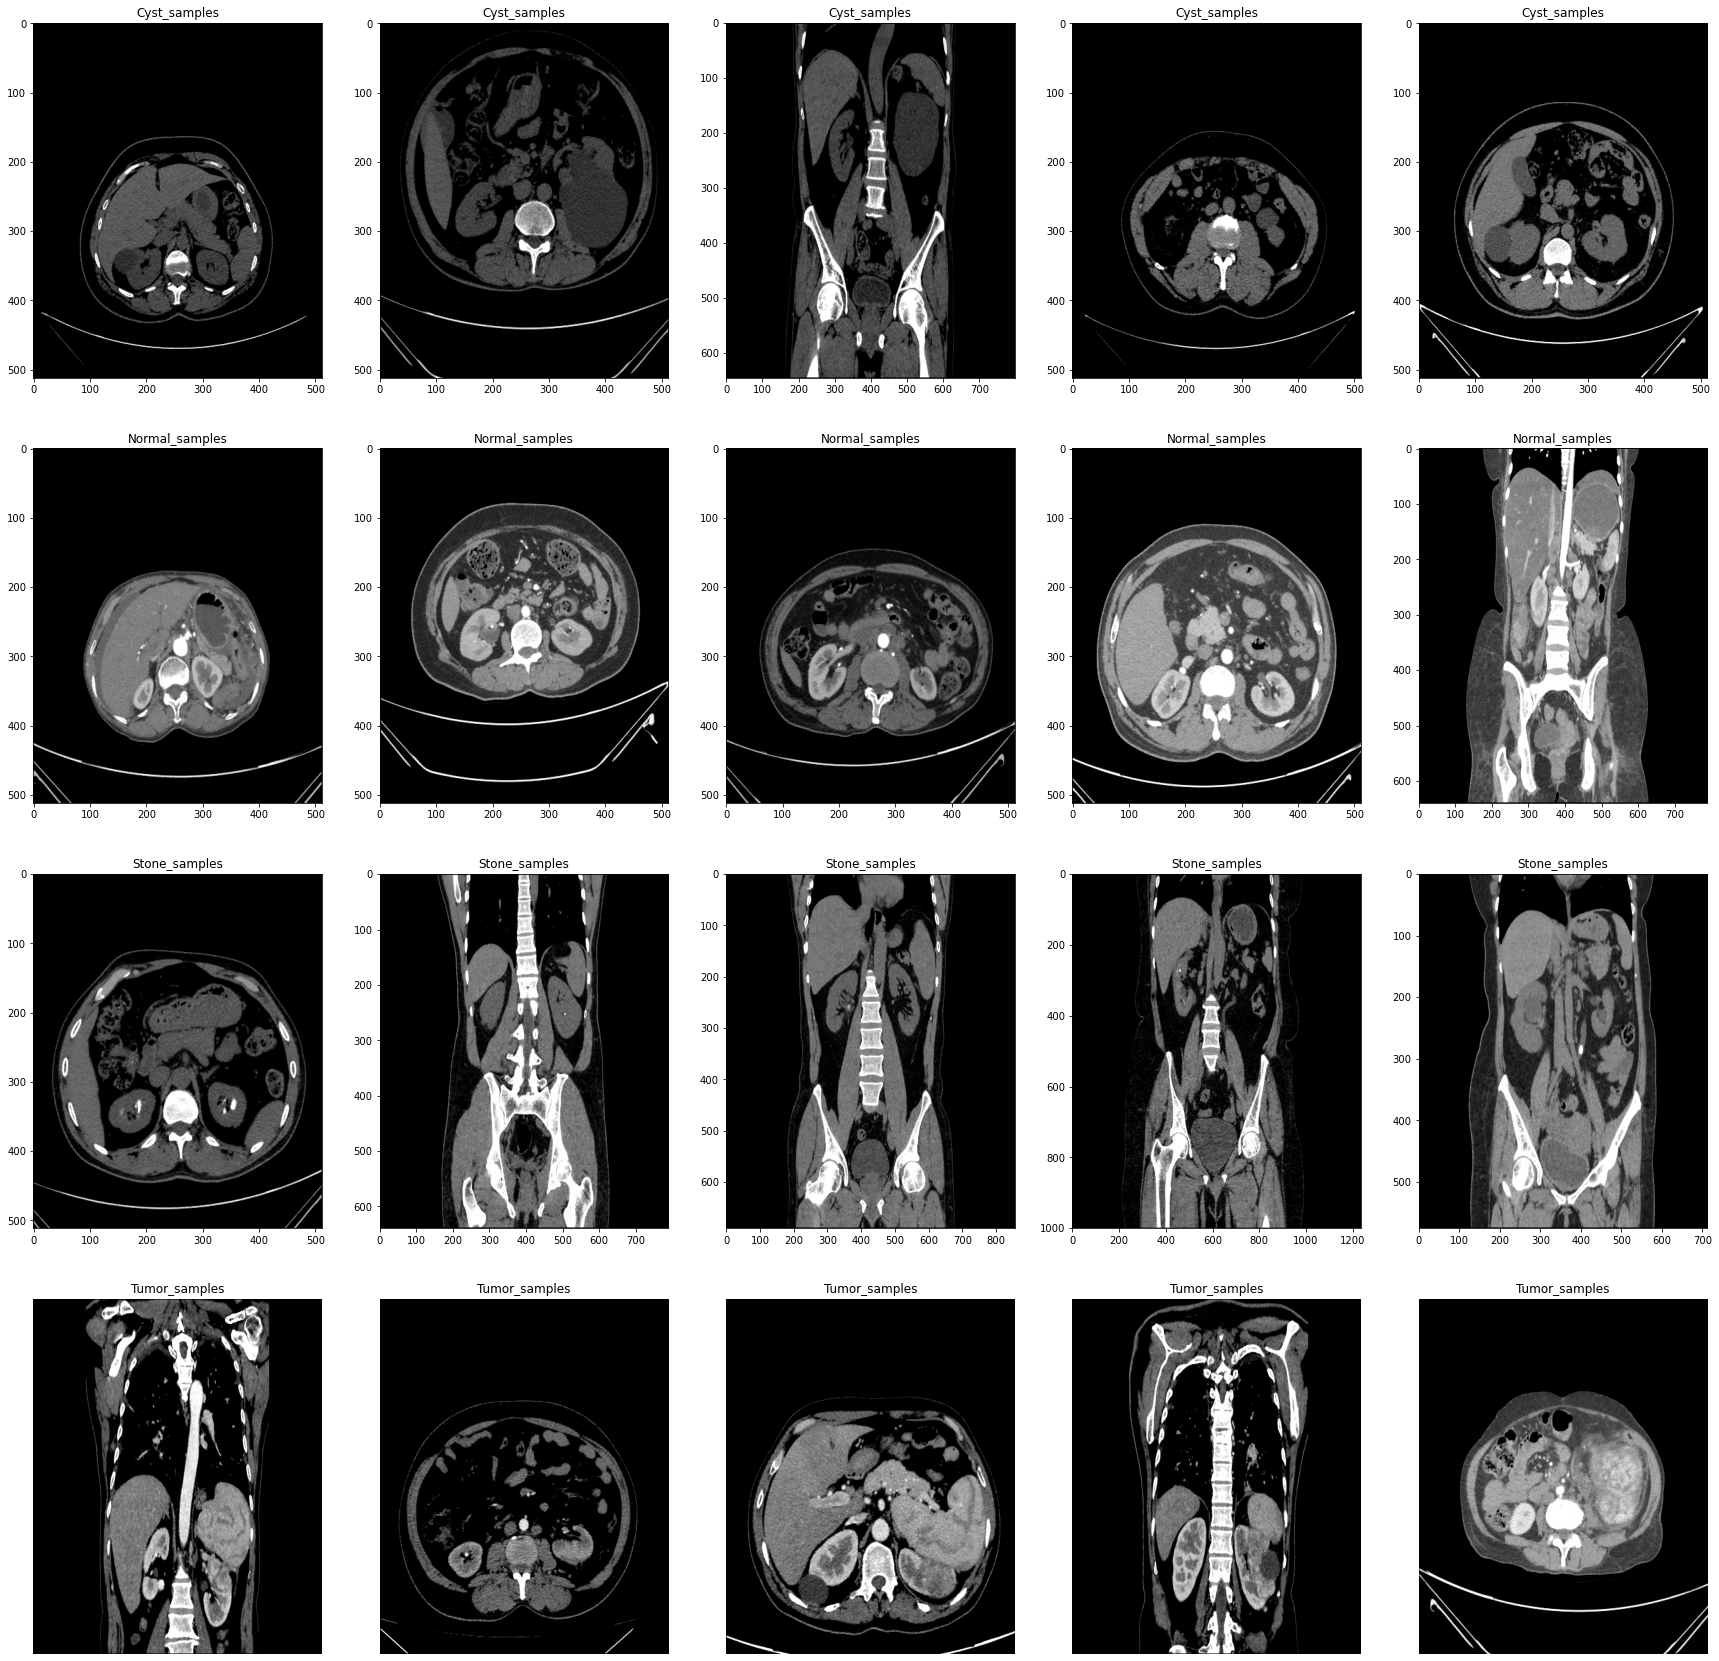

In [10]:
Cyst_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Normal_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
Tumor_samples = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()
samples = Cyst_samples + Normal_samples+Stone_samples+Tumor_samples

del Cyst_samples, Normal_samples,Stone_samples,Tumor_samples
f, ax = plt.subplots(4,5, figsize=(30,30))
for i in range(20):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
        ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()
    

In [18]:
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')
train_data = []
train_labels = []

for img in Cyst_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)
train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)


Total number of validation examples:  (12446, 28, 28, 3)
Total number of labels: (12446,)


In [20]:
train_data1.shape

(12446, 28, 28, 3)

In [21]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.76862745, 0.76862745, 0.76862745],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [22]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst


In [23]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [24]:
train_labels1['label']=train_labels1['label'].map({'Cyst':0,'Normal':1,
                                                   'Stone':2,'Tumor':3
                                                  })

In [25]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [26]:
print(train_data1.shape)
print(train_labels1.shape)

(12446, 28, 28, 3)
(12446, 1)


In [27]:
train_labels1.isnull().sum()

label    0
dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64


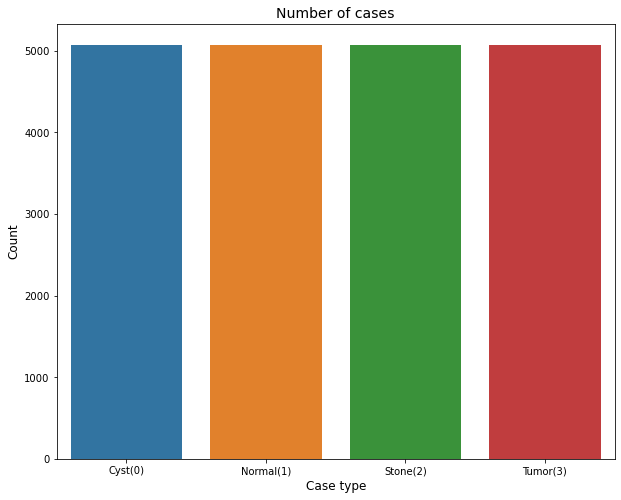

In [32]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)
 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [33]:
train_data2.shape

(20308, 2352)

In [35]:
train_labels2.shape

(20308, 1)

In [36]:
train_labels2['label'].value_counts()


0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64

In [38]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.23, random_state=42)

In [40]:
import tensorflow as tf
data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

In [41]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    #data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 53,904
Trainable params: 53,904
Non-traina

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/100
489/489 [==============================] - 22s 33ms/step - loss: 0.4088 - accuracy: 0.8376 - val_loss: 0.0468 - val_accuracy: 0.9906
Epoch 2/100
489/489 [==============================] - 16s 33ms/step - loss: 0.0487 - accuracy: 0.9870 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 3/100
489/489 [==============================] - 16s 33ms/step - loss: 0.0354 - accuracy: 0.9902 - val_loss: 0.0191 - val_accuracy: 0.9959
Epoch 4/100
489/489 [==============================] - 16s 33ms/step - loss: 0.0292 - accuracy: 0.9924 - val_loss: 0.0211 - val_accuracy: 0.9955
Epoch 5/100
489/489 [==============================] - 16s 32ms/step - loss: 0.0153 - accuracy: 0.9965 - val_loss: 0.0197 - val_accuracy: 0.9964
Epoch 6/100
489/489 [==============================] - 16s 32ms/step - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.0177 - val_accuracy: 0.9968
Epoch 7/100
489/489 [==============================] - 16s 32ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0191 - val_ac